# Elementary kids nearsighted ratio

## Pseudo inverse

In [111]:
# N (600 equations) > n (2 unknowns)
# y = mx + b 

In [112]:
import math 
import numpy as np
import matplotlib.pyplot as plt

## Entering data

float64 6 float64 6


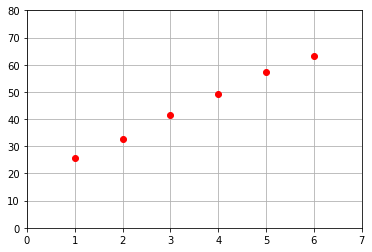

In [113]:
x = np.array([1.0,2.0,3.0,4.0,5.0,6.0])
y = np.array([25.64, 32.71, 41.33, 49.13, 57.21, 63.21])
print(x.dtype, x.size, y.dtype, y.size)
plt.plot(x,y,'ro')
plt.xlim([0,7])
plt.ylim([0, 80])
plt.grid()

## Set A_matrix and b_matrix

In [114]:
only_one = np.ones(x.size) 
A_array = (x, only_one)
A_tmp = np.asmatrix(A_array)
A_matrix = np.matrix.transpose(A_tmp)

B_tmp = np.asmatrix(y)
B_matrix = np.matrix.transpose(B_tmp)

print(only_one)
print(x)
print(A_array)
print(A_tmp, '\n\n')

# ---------------
print(A_matrix,'\n')
print(A_matrix.dtype,A_matrix.size,'\n')
print(B_matrix,'\n')
print(B_matrix.dtype,B_matrix.size,'\n')

[1. 1. 1. 1. 1. 1.]
[1. 2. 3. 4. 5. 6.]
(array([1., 2., 3., 4., 5., 6.]), array([1., 1., 1., 1., 1., 1.]))
[[1. 2. 3. 4. 5. 6.]
 [1. 1. 1. 1. 1. 1.]] 


[[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]
 [6. 1.]] 

float64 12 

[[25.64]
 [32.71]
 [41.33]
 [49.13]
 [57.21]
 [63.21]] 

float64 6 



In [115]:
A_transpose = np.matrix.transpose(A_matrix)
A_square = A_transpose*A_matrix
A_square_inverse = np.linalg.inv(A_square)

X_matrix = A_square_inverse * A_transpose * B_matrix
print(A_transpose, "\n")
print(A_square, "\n")
print(A_square_inverse, "\n")
print(X_matrix, '\n') #X_matrix[0] = slope, X_matrix[1] = bias

[[1. 2. 3. 4. 5. 6.]
 [1. 1. 1. 1. 1. 1.]] 

[[91. 21.]
 [21.  6.]] 

[[ 0.05714286 -0.2       ]
 [-0.2         0.86666667]] 

[[ 7.69      ]
 [17.95666667]] 



In [116]:
print(X_matrix[0])

[[7.69]]


In [117]:
x_fit = np.zeros(2)
y_fit = np.zeros(2)
x_fit[0] = 1
x_fit[1] = 6
m_slope = X_matrix[0]
b_bias = X_matrix[1]
y_fit[0] = m_slope*1 + b_bias
y_fit[1] = m_slope*6 + b_bias

print(x_fit)

[1. 6.]


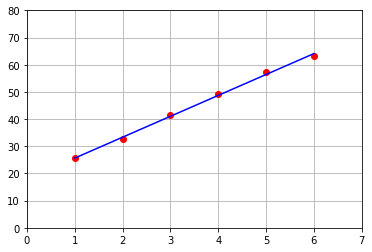

In [118]:
plt.xlim([0,7])
plt.ylim([0,80])
plt.plot(x,y,'ro')
plt.plot(x_fit,y_fit,'b-')
plt.grid()
plt.show()

## Noise

In [119]:
mu, sigma = 0, 1 #mean and standard deviation from 0 to 1 
x_noise = 0.2*np.random.normal(mu, sigma, 600)
y_noise = 2.0*np.random.normal(mu, sigma, 600)

print(max(x_noise), min(x_noise))

0.6075269853587876 -0.6765910924527665


599 5 6.0
float64 6 float64 6


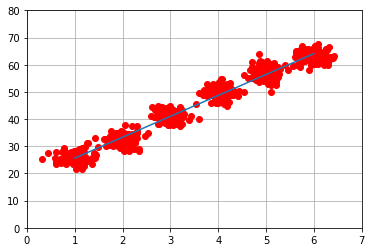

In [122]:
x_new = np.zeros(600)
y_new = np.zeros(600)
for i in range(0,600):
    r1 = int(i/100) #r1 = int(0 to 6)
    x_new[i] = x[r1] + x_noise[i]
    y_new[i] = y[r1] + y_noise[i]

    
print(i, r1, x[r1])

x_new
y_new
print(x.dtype, x.size, y.dtype, y.size)


plt.plot(x_new,y_new,'ro')
plt.plot(x_fit,y_fit)
plt.xlim([0,7])
plt.ylim([0,80])
plt.grid()